# PART 1 & 2


Training FCN_50K:

  Training with Learning Rate = 0.001
Model with hidden_dims=[64, 32]: total_params=52650
    Epoch [1/20] Train Loss: 0.8736  Train Acc: 0.7226 Val Loss: 0.4569  Val Acc: 0.8447
    Epoch [2/20] Train Loss: 0.5726  Train Acc: 0.8066 Val Loss: 0.4032  Val Acc: 0.8557
    Epoch [3/20] Train Loss: 0.5116  Train Acc: 0.8262 Val Loss: 0.3833  Val Acc: 0.8623
    Epoch [4/20] Train Loss: 0.4831  Train Acc: 0.8331 Val Loss: 0.3743  Val Acc: 0.8640
    Epoch [5/20] Train Loss: 0.4590  Train Acc: 0.8414 Val Loss: 0.3620  Val Acc: 0.8658
    Epoch [6/20] Train Loss: 0.4483  Train Acc: 0.8452 Val Loss: 0.3583  Val Acc: 0.8700
    Epoch [7/20] Train Loss: 0.4279  Train Acc: 0.8530 Val Loss: 0.3477  Val Acc: 0.8713
    Epoch [8/20] Train Loss: 0.4229  Train Acc: 0.8543 Val Loss: 0.3515  Val Acc: 0.8735
    Epoch [9/20] Train Loss: 0.4105  Train Acc: 0.8565 Val Loss: 0.3458  Val Acc: 0.8778
    Epoch [10/20] Train Loss: 0.4018  Train Acc: 0.8592 Val Loss: 0.3424  Val Acc: 0.8757

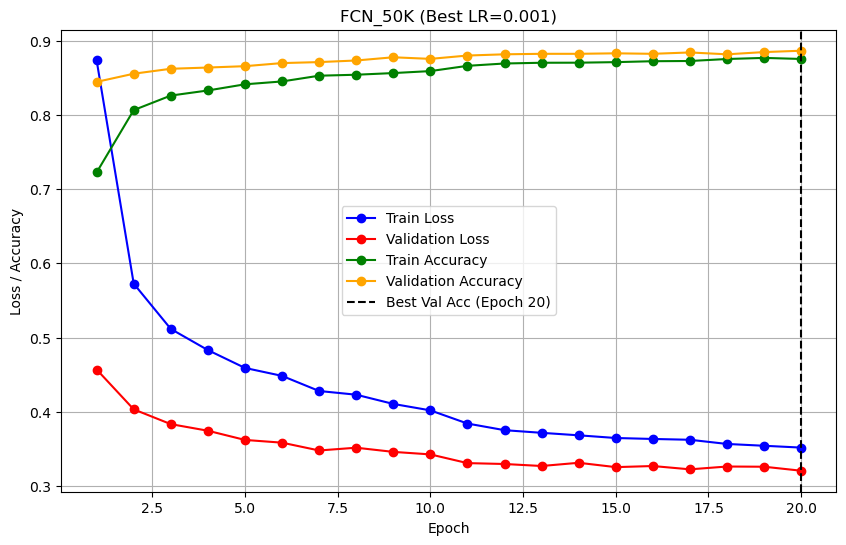


Training FCN_100K:

  Training with Learning Rate = 0.001
Model with hidden_dims=[96, 48]: total_params=80506
    Epoch [1/20] Train Loss: 0.7383  Train Acc: 0.7586 Val Loss: 0.4406  Val Acc: 0.8372
    Epoch [2/20] Train Loss: 0.4991  Train Acc: 0.8281 Val Loss: 0.3800  Val Acc: 0.8590
    Epoch [3/20] Train Loss: 0.4513  Train Acc: 0.8425 Val Loss: 0.3688  Val Acc: 0.8690
    Epoch [4/20] Train Loss: 0.4240  Train Acc: 0.8491 Val Loss: 0.3546  Val Acc: 0.8752
    Epoch [5/20] Train Loss: 0.4061  Train Acc: 0.8558 Val Loss: 0.3420  Val Acc: 0.8777
    Epoch [6/20] Train Loss: 0.3921  Train Acc: 0.8600 Val Loss: 0.3369  Val Acc: 0.8823
    Epoch [7/20] Train Loss: 0.3735  Train Acc: 0.8678 Val Loss: 0.3368  Val Acc: 0.8808
    Epoch [8/20] Train Loss: 0.3642  Train Acc: 0.8720 Val Loss: 0.3279  Val Acc: 0.8825
    Epoch [9/20] Train Loss: 0.3592  Train Acc: 0.8708 Val Loss: 0.3204  Val Acc: 0.8858
    Epoch [10/20] Train Loss: 0.3493  Train Acc: 0.8769 Val Loss: 0.3303  Val Acc: 0.879

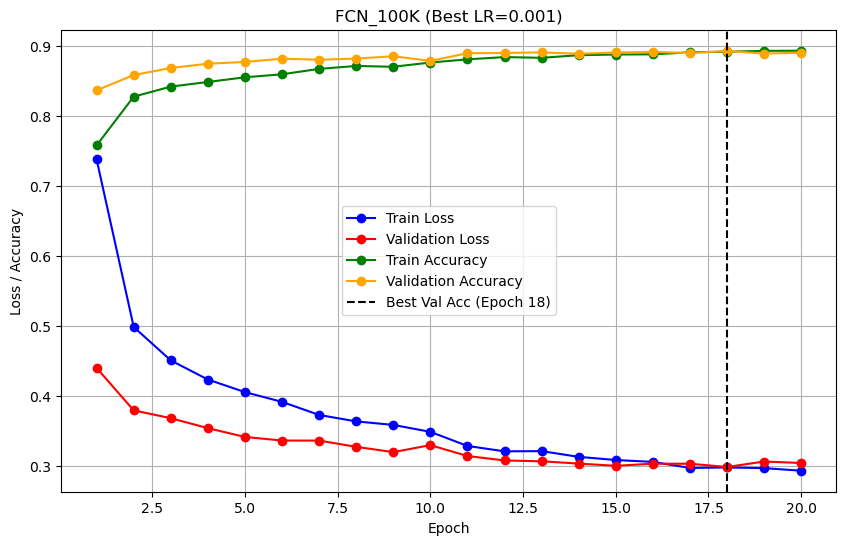


Training FCN_200K:

  Training with Learning Rate = 0.001
Model with hidden_dims=[224, 112]: total_params=202170
    Epoch [1/20] Train Loss: 0.5867  Train Acc: 0.7951 Val Loss: 0.4117  Val Acc: 0.8517
    Epoch [2/20] Train Loss: 0.4222  Train Acc: 0.8487 Val Loss: 0.3636  Val Acc: 0.8658
    Epoch [3/20] Train Loss: 0.3848  Train Acc: 0.8614 Val Loss: 0.3313  Val Acc: 0.8823
    Epoch [4/20] Train Loss: 0.3600  Train Acc: 0.8699 Val Loss: 0.3267  Val Acc: 0.8808
    Epoch [5/20] Train Loss: 0.3359  Train Acc: 0.8763 Val Loss: 0.3145  Val Acc: 0.8900
    Epoch [6/20] Train Loss: 0.3229  Train Acc: 0.8814 Val Loss: 0.3282  Val Acc: 0.8825
    Epoch [7/20] Train Loss: 0.3152  Train Acc: 0.8830 Val Loss: 0.3061  Val Acc: 0.8892
    Epoch [8/20] Train Loss: 0.2997  Train Acc: 0.8894 Val Loss: 0.3010  Val Acc: 0.8940
    Epoch [9/20] Train Loss: 0.2881  Train Acc: 0.8935 Val Loss: 0.3033  Val Acc: 0.8880
    Epoch [10/20] Train Loss: 0.2863  Train Acc: 0.8946 Val Loss: 0.3015  Val Acc: 0.

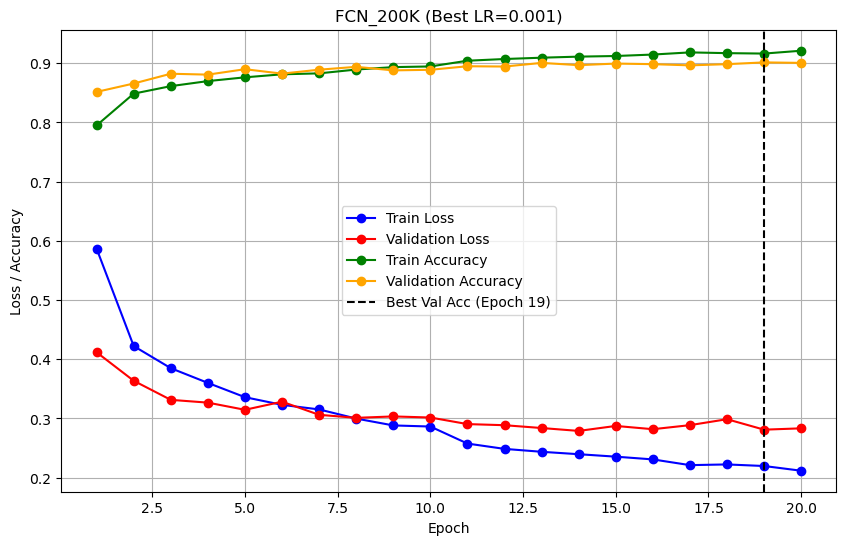

In [62]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# Xavier Initialization Function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# 1) Data Loading
train_dataset = torchvision.datasets.FashionMNIST(
    'data/', train=True, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_dataset = torchvision.datasets.FashionMNIST(
    'data/', train=False, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

# Create a validation set (10% of the training set)
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

train_split = Subset(train_dataset, train_indices)
val_split   = Subset(train_dataset, val_indices)

train_batch_size = 128
test_batch_size  = 256

train_loader = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_loader   = DataLoader(val_split,   batch_size=train_batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

# 2) Define an FCN Model with a parameter check
class FCN(nn.Module):
    def __init__(self, input_dim=784, hidden_dims=[96, 48], output_dim=10, dropout_rate=0.3):
        super(FCN, self).__init__()
        layers = []
        all_dims = [input_dim] + hidden_dims + [output_dim]

        total_params = 0
        for i in range(len(all_dims) - 1):
            layer = nn.Linear(all_dims[i], all_dims[i + 1])
            # Count parameters for the layer
            total_params += all_dims[i] * all_dims[i + 1] + all_dims[i + 1]
            layers.append(layer)
            
            # For hidden layers, apply BatchNorm, ReLU, Dropout
            if i < len(all_dims) - 2:
                layers.append(nn.BatchNorm1d(all_dims[i + 1]))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout_rate))

        print(f"Model with hidden_dims={hidden_dims}: total_params={total_params}")
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        return self.network(x)

# 3) Train & Evaluate a Single Model
def train_and_evaluate(hidden_dims, learning_rates, num_epochs=30, dropout_rate=0.3):
    """
    Trains a model with the given hidden_dims over multiple learning rates.
    Returns the best model state (based on val accuracy), plus metrics.
    """
    best_val_acc_global = 0.0
    best_epoch_global   = 0
    best_lr_global      = None

    best_train_losses      = []
    best_val_losses        = []
    best_train_accuracies  = []
    best_val_accuracies    = []
    best_model_state       = None

    for lr in learning_rates:
        print(f"\n  Training with Learning Rate = {lr}")
        
        # Re-initialize the model from scratch
        model = FCN(input_dim=784, hidden_dims=hidden_dims, output_dim=10, dropout_rate=dropout_rate).to(device)
        model.apply(init_weights_xavier)
        
        # Optimizer & Scheduler
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
        
        criterion = nn.CrossEntropyLoss()
        
        # Lists to track metrics per epoch for THIS LR
        train_losses = []
        val_losses   = []
        train_accuracies = []
        val_accuracies   = []
        
        best_val_acc_local = 0.0
        best_epoch_local   = 0
        best_state_local   = None
        
        for epoch in range(num_epochs):
            # Training phase
            model.train()
            running_loss, correct_train, total_train = 0.0, 0, 0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_train += (predicted == labels).sum().item()
                total_train += labels.size(0)

            train_loss = running_loss / len(train_loader)
            train_acc  = correct_train / total_train

            train_losses.append(train_loss)
            train_accuracies.append(train_acc)

            # Validation phase
            model.eval()
            val_correct, val_total, val_running_loss = 0, 0, 0.0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_running_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    val_correct += (predicted == labels).sum().item()
                    val_total += labels.size(0)

            val_loss = val_running_loss / len(val_loader)
            val_acc  = val_correct / val_total

            val_losses.append(val_loss)
            val_accuracies.append(val_acc)

            # Update best validation accuracy for THIS LR
            if val_acc > best_val_acc_local:
                best_val_acc_local = val_acc
                best_epoch_local   = epoch + 1
                best_state_local   = copy.deepcopy(model.state_dict())

            # Step the scheduler
            scheduler.step()

            # Print training info
            print(f"    Epoch [{epoch+1}/{num_epochs}] "
                  f"Train Loss: {train_loss:.4f}  Train Acc: {train_acc:.4f} "
                  f"Val Loss: {val_loss:.4f}  Val Acc: {val_acc:.4f}")

        # After finishing all epochs for this LR, check if it's better than global best
        if best_val_acc_local > best_val_acc_global:
            best_val_acc_global = best_val_acc_local
            best_epoch_global   = best_epoch_local
            best_lr_global      = lr
            
            best_train_losses      = train_losses
            best_val_losses        = val_losses
            best_train_accuracies  = train_accuracies
            best_val_accuracies    = val_accuracies
            
            best_model_state = best_state_local

    return {
        'best_val_acc': best_val_acc_global,
        'best_epoch':   best_epoch_global,
        'best_lr':      best_lr_global,
        'train_losses': best_train_losses,
        'val_losses':   best_val_losses,
        'train_accs':   best_train_accuracies,
        'val_accs':     best_val_accuracies,
        'best_model':   best_model_state
    }

# 4) Compare Three FCN Variants: ~50K, ~100K, ~200K
model_configs = {
    "FCN_50K":  [64, 32],
    "FCN_100K": [96, 48],
    "FCN_200K": [224, 112]
}

lrs = [0.001, 0.0005, 0.0001]
num_epochs = 20
dropout_rate = 0.3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

results = {}

for model_name, hidden_dims in model_configs.items():
    print(f"\nTraining {model_name}:")
    outcome = train_and_evaluate(
        hidden_dims=hidden_dims,
        learning_rates=lrs,
        num_epochs=num_epochs,
        dropout_rate=dropout_rate
    )
    results[model_name] = outcome

    # Once we have the best model for this variant, evaluate on the test set
    best_model = FCN(input_dim=784, hidden_dims=hidden_dims, 
                     output_dim=10, dropout_rate=dropout_rate).to(device)
    best_model.load_state_dict(outcome['best_model'])
    best_model.eval()

    test_correct, test_total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = best_model(images)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            test_total   += labels.size(0)

    test_acc = test_correct / test_total
    print(f"--- {model_name} Results ---")
    print(f"Best Learning Rate: {outcome['best_lr']}")
    print(f"Best Validation Accuracy: {outcome['best_val_acc']:.4f} "
          f"(Epoch {outcome['best_epoch']})")
    print(f"Test Accuracy: {test_acc:.4f}\n")

    # 5) Plot only for this model’s best run
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs_range, outcome['train_losses'], 'o-', label='Train Loss', color='blue')
    plt.plot(epochs_range, outcome['val_losses'],   'o-', label='Validation Loss', color='red')
    plt.plot(epochs_range, outcome['train_accs'],   'o-', label='Train Accuracy', color='green')
    plt.plot(epochs_range, outcome['val_accs'],     'o-', label='Validation Accuracy', color='orange')

    plt.axvline(x=outcome['best_epoch'], color='black', linestyle='--',
                label=f'Best Val Acc (Epoch {outcome["best_epoch"]})')

    plt.title(f"{model_name} (Best LR={outcome['best_lr']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# PART 3 & 4


Training CNN_10K:

  Training with Learning Rate = 0.001
CNN with (conv1_out=4, conv2_out=8, fc_dim=45): Total params=9841
    Epoch [1/20] Train Loss: 0.8757  Train Acc: 0.6859 Val Loss: 0.5370  Val Acc: 0.7993
    Epoch [2/20] Train Loss: 0.5602  Train Acc: 0.7911 Val Loss: 0.4641  Val Acc: 0.8297
    Epoch [3/20] Train Loss: 0.5031  Train Acc: 0.8153 Val Loss: 0.4426  Val Acc: 0.8400
    Epoch [4/20] Train Loss: 0.4698  Train Acc: 0.8285 Val Loss: 0.4054  Val Acc: 0.8530
    Epoch [5/20] Train Loss: 0.4487  Train Acc: 0.8376 Val Loss: 0.3957  Val Acc: 0.8597
    Epoch [6/20] Train Loss: 0.4368  Train Acc: 0.8412 Val Loss: 0.3862  Val Acc: 0.8613
    Epoch [7/20] Train Loss: 0.4218  Train Acc: 0.8453 Val Loss: 0.3671  Val Acc: 0.8667
    Epoch [8/20] Train Loss: 0.4122  Train Acc: 0.8504 Val Loss: 0.3607  Val Acc: 0.8667
    Epoch [9/20] Train Loss: 0.4015  Train Acc: 0.8530 Val Loss: 0.3562  Val Acc: 0.8718
    Epoch [10/20] Train Loss: 0.3994  Train Acc: 0.8549 Val Loss: 0.3476  V

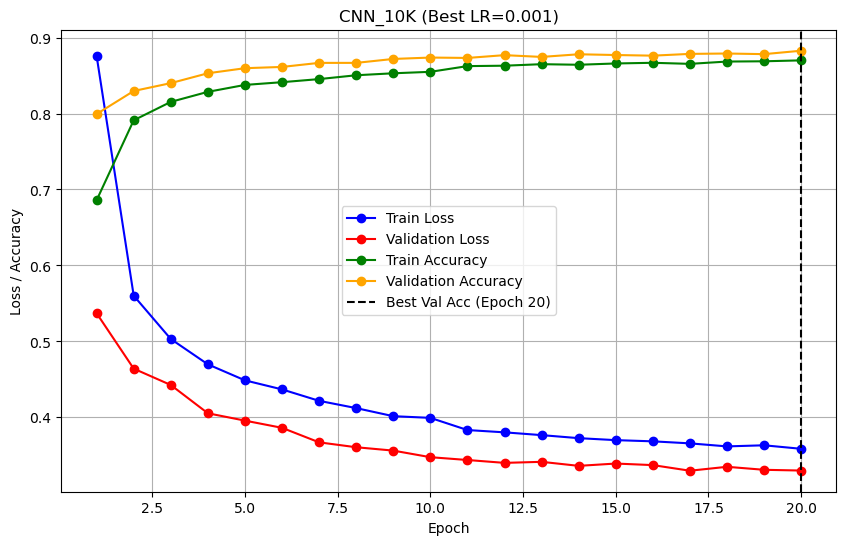


Training CNN_20K:

  Training with Learning Rate = 0.001
CNN with (conv1_out=6, conv2_out=12, fc_dim=60): Total params=19390
    Epoch [1/20] Train Loss: 0.7992  Train Acc: 0.7121 Val Loss: 0.5052  Val Acc: 0.8157
    Epoch [2/20] Train Loss: 0.5154  Train Acc: 0.8094 Val Loss: 0.4333  Val Acc: 0.8440
    Epoch [3/20] Train Loss: 0.4582  Train Acc: 0.8303 Val Loss: 0.4015  Val Acc: 0.8547
    Epoch [4/20] Train Loss: 0.4242  Train Acc: 0.8450 Val Loss: 0.3748  Val Acc: 0.8637
    Epoch [5/20] Train Loss: 0.4034  Train Acc: 0.8521 Val Loss: 0.3594  Val Acc: 0.8695
    Epoch [6/20] Train Loss: 0.3840  Train Acc: 0.8599 Val Loss: 0.3605  Val Acc: 0.8697
    Epoch [7/20] Train Loss: 0.3732  Train Acc: 0.8643 Val Loss: 0.3339  Val Acc: 0.8822
    Epoch [8/20] Train Loss: 0.3642  Train Acc: 0.8663 Val Loss: 0.3281  Val Acc: 0.8795
    Epoch [9/20] Train Loss: 0.3531  Train Acc: 0.8720 Val Loss: 0.3296  Val Acc: 0.8797
    Epoch [10/20] Train Loss: 0.3482  Train Acc: 0.8736 Val Loss: 0.3287 

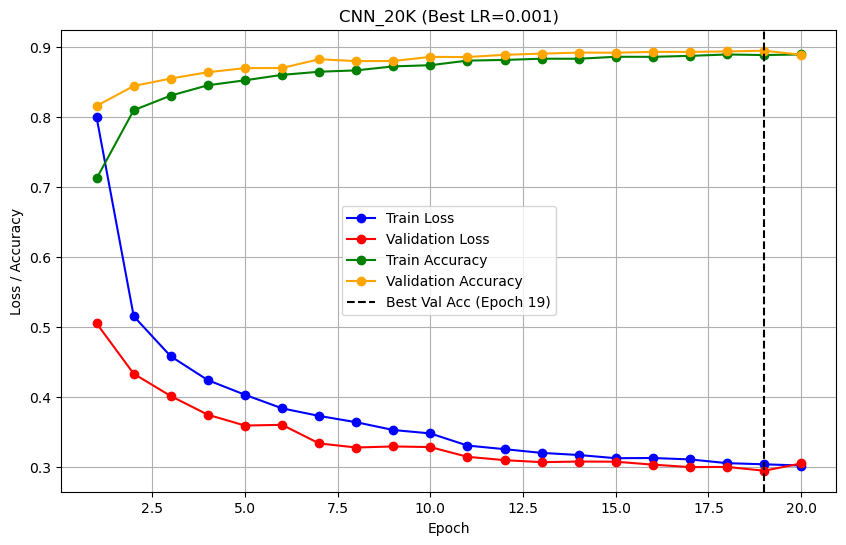


Training CNN_50K:

  Training with Learning Rate = 0.001
CNN with (conv1_out=8, conv2_out=16, fc_dim=120): Total params=50578
    Epoch [1/20] Train Loss: 0.7016  Train Acc: 0.7464 Val Loss: 0.4528  Val Acc: 0.8380
    Epoch [2/20] Train Loss: 0.4631  Train Acc: 0.8302 Val Loss: 0.3859  Val Acc: 0.8657
    Epoch [3/20] Train Loss: 0.4093  Train Acc: 0.8521 Val Loss: 0.3572  Val Acc: 0.8675
    Epoch [4/20] Train Loss: 0.3724  Train Acc: 0.8646 Val Loss: 0.3303  Val Acc: 0.8825
    Epoch [5/20] Train Loss: 0.3469  Train Acc: 0.8729 Val Loss: 0.3118  Val Acc: 0.8857
    Epoch [6/20] Train Loss: 0.3315  Train Acc: 0.8775 Val Loss: 0.3128  Val Acc: 0.8820
    Epoch [7/20] Train Loss: 0.3172  Train Acc: 0.8847 Val Loss: 0.3016  Val Acc: 0.8872
    Epoch [8/20] Train Loss: 0.3029  Train Acc: 0.8877 Val Loss: 0.2925  Val Acc: 0.8910
    Epoch [9/20] Train Loss: 0.2940  Train Acc: 0.8924 Val Loss: 0.2867  Val Acc: 0.8915
    Epoch [10/20] Train Loss: 0.2867  Train Acc: 0.8945 Val Loss: 0.2966

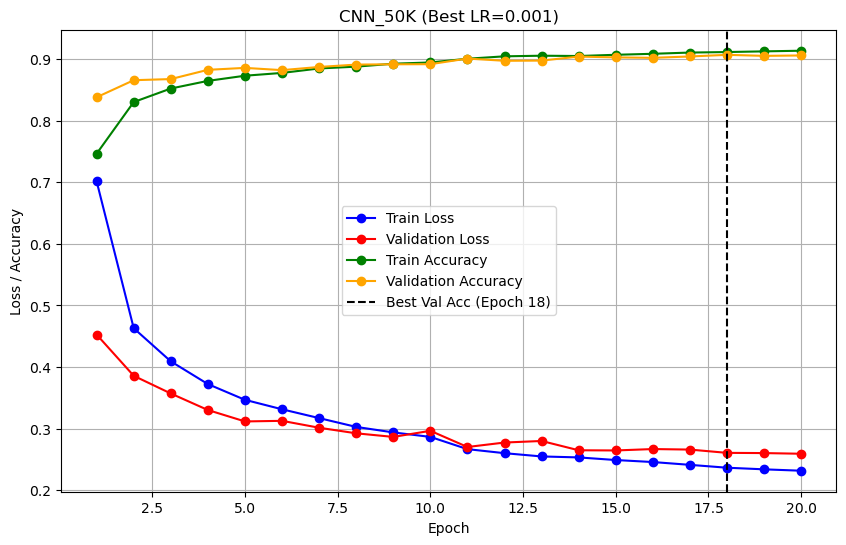


Training CNN_100K:

  Training with Learning Rate = 0.001
CNN with (conv1_out=16, conv2_out=32, fc_dim=120): Total params=102130
    Epoch [1/20] Train Loss: 0.6236  Train Acc: 0.7716 Val Loss: 0.4137  Val Acc: 0.8478
    Epoch [2/20] Train Loss: 0.3966  Train Acc: 0.8551 Val Loss: 0.3376  Val Acc: 0.8785
    Epoch [3/20] Train Loss: 0.3481  Train Acc: 0.8721 Val Loss: 0.3078  Val Acc: 0.8868
    Epoch [4/20] Train Loss: 0.3199  Train Acc: 0.8823 Val Loss: 0.2956  Val Acc: 0.8900
    Epoch [5/20] Train Loss: 0.2976  Train Acc: 0.8917 Val Loss: 0.2879  Val Acc: 0.8933
    Epoch [6/20] Train Loss: 0.2829  Train Acc: 0.8956 Val Loss: 0.2718  Val Acc: 0.8990
    Epoch [7/20] Train Loss: 0.2697  Train Acc: 0.9007 Val Loss: 0.2704  Val Acc: 0.9015
    Epoch [8/20] Train Loss: 0.2569  Train Acc: 0.9039 Val Loss: 0.2711  Val Acc: 0.8988
    Epoch [9/20] Train Loss: 0.2446  Train Acc: 0.9098 Val Loss: 0.2661  Val Acc: 0.9015
    Epoch [10/20] Train Loss: 0.2402  Train Acc: 0.9116 Val Loss: 0.2

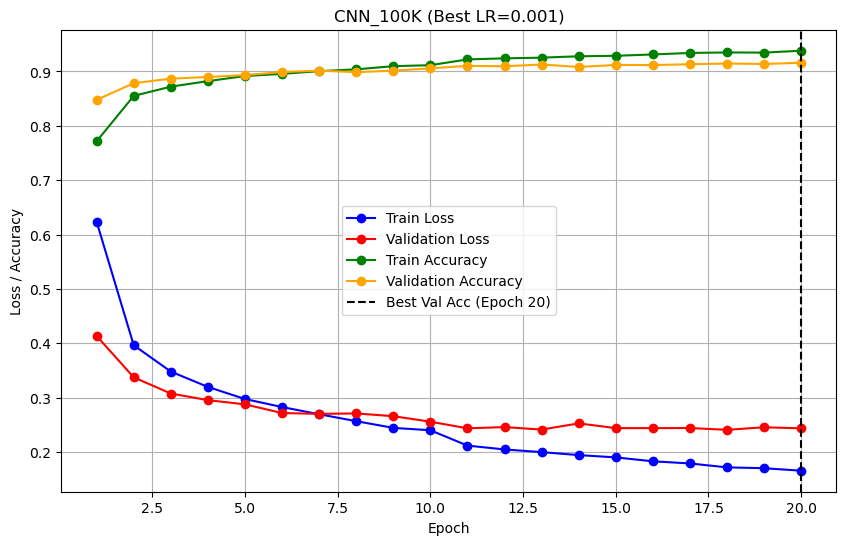

In [67]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# 1) Data Loading
train_dataset = torchvision.datasets.FashionMNIST(
    'data/', train=True, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_dataset = torchvision.datasets.FashionMNIST(
    'data/', train=False, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

# Create a validation set (10% of the training set)
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

train_split = Subset(train_dataset, train_indices)
val_split   = Subset(train_dataset, val_indices)

train_batch_size = 128
test_batch_size  = 256

train_loader = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_loader   = DataLoader(val_split,   batch_size=train_batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 2) Define a CNN class with param sizes close to 10K, 20K, 50K, or 100K
#    using 2 convolutional layers + pooling + 1 fully-connected layer.
class CNN(nn.Module):
    def __init__(self, conv1_out=16, conv2_out=32, fc_dim=120, dropout_rate=0.3):
        super(CNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=conv1_out, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=conv1_out, out_channels=conv2_out, kernel_size=3, stride=1, padding=0)
        
        # Pooling layer
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Flatten that into conv2_out * 5 * 5 features
        flatten_dim = conv2_out * 5 * 5
        
        # Fully connected layers
        self.fc1 = nn.Linear(flatten_dim, fc_dim)
        self.fc2 = nn.Linear(fc_dim, 10)
        
        # Other layers
        self.dropout = nn.Dropout(dropout_rate)
        self.relu    = nn.ReLU()
        
        # Print total param count
        total_params = sum(p.numel() for p in self.parameters())
        print(f"CNN with (conv1_out={conv1_out}, conv2_out={conv2_out}, fc_dim={fc_dim}): "
              f"Total params={total_params}")

    def forward(self, x):
        # Convolution + ReLU + Pool (1st block)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # Convolution + ReLU + Pool (2nd block)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected + ReLU + Dropout + final linear
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x


# 3) Train & Evaluate Function (similar to your FCN approach)
def train_and_evaluate_cnn(conv1_out, conv2_out, fc_dim, learning_rates,
                           num_epochs=20, dropout_rate=0.3):
    """
    Trains a CNN with the given conv/fc dims over multiple learning rates.
    Returns the best model state (based on val accuracy), plus metrics.
    """
    best_val_acc_global = 0.0
    best_epoch_global   = 0
    best_lr_global      = None

    best_train_losses     = []
    best_val_losses       = []
    best_train_accuracies = []
    best_val_accuracies   = []
    best_model_state      = None

    for lr in learning_rates:
        print(f"\n  Training with Learning Rate = {lr}")
        
        # Re-initialize the model from scratch
        model = CNN(conv1_out=conv1_out, conv2_out=conv2_out, fc_dim=fc_dim,
                    dropout_rate=dropout_rate).to(device)
        
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
        criterion = nn.CrossEntropyLoss()
        
        train_losses     = []
        val_losses       = []
        train_accuracies = []
        val_accuracies   = []
        
        best_val_acc_local = 0.0
        best_epoch_local   = 0
        best_state_local   = None
        
        for epoch in range(num_epochs):
            # Training phase
            model.train()
            running_loss, correct_train, total_train = 0.0, 0, 0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_train += (predicted == labels).sum().item()
                total_train += labels.size(0)

            train_loss = running_loss / len(train_loader)
            train_acc  = correct_train / total_train
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)

            # Validation phase
            model.eval()
            val_correct, val_total, val_running_loss = 0, 0, 0.0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_running_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    val_correct += (predicted == labels).sum().item()
                    val_total += labels.size(0)

            val_loss = val_running_loss / len(val_loader)
            val_acc  = val_correct / val_total
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)

            # Update best validation accuracy for THIS LR
            if val_acc > best_val_acc_local:
                best_val_acc_local = val_acc
                best_epoch_local   = epoch + 1
                best_state_local   = copy.deepcopy(model.state_dict())

            scheduler.step()

            print(f"    Epoch [{epoch+1}/{num_epochs}] "
                  f"Train Loss: {train_loss:.4f}  Train Acc: {train_acc:.4f} "
                  f"Val Loss: {val_loss:.4f}  Val Acc: {val_acc:.4f}")

        # After all epochs for this LR, see if it's better than global best
        if best_val_acc_local > best_val_acc_global:
            best_val_acc_global = best_val_acc_local
            best_epoch_global   = best_epoch_local
            best_lr_global      = lr
            
            best_train_losses     = train_losses
            best_val_losses       = val_losses
            best_train_accuracies = train_accuracies
            best_val_accuracies   = val_accuracies
            
            best_model_state = best_state_local

    return {
        'best_val_acc': best_val_acc_global,
        'best_epoch':   best_epoch_global,
        'best_lr':      best_lr_global,
        'train_losses': best_train_losses,
        'val_losses':   best_val_losses,
        'train_accs':   best_train_accuracies,
        'val_accs':     best_val_accuracies,
        'best_model':   best_model_state
    }


# 4) Part 3 & 4: Train CNN 100K/50K/20K/10K, each with 3 LRs
model_configs = {
    # Part 4: smaller models
    "CNN_10K":  (4,  8,  45),   # ~9.8K params
    "CNN_20K":  (6, 12,  60),   # ~19K params
    "CNN_50K":  (8, 16, 120),   # ~50K params
    # Part 3: up to ~100K model
    "CNN_100K": (16, 32, 120)   # ~100K params
}

lrs = [0.001, 0.0005, 0.0001]
num_epochs   = 20
dropout_rate = 0.3

results = {}

for model_name, (c1, c2, fc) in model_configs.items():
    print(f"\nTraining {model_name}:")
    outcome = train_and_evaluate_cnn(
        conv1_out=c1,
        conv2_out=c2,
        fc_dim=fc,
        learning_rates=lrs,
        num_epochs=num_epochs,
        dropout_rate=dropout_rate
    )
    results[model_name] = outcome

    # Load the best model state and evaluate on the test set
    best_model = CNN(conv1_out=c1, conv2_out=c2, fc_dim=fc, dropout_rate=dropout_rate).to(device)
    best_model.load_state_dict(outcome['best_model'])
    best_model.eval()

    test_correct, test_total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = best_model(images)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            test_total   += labels.size(0)

    test_acc = test_correct / test_total

    print(f"--- {model_name} Results ---")
    print(f"Best Learning Rate: {outcome['best_lr']}")
    print(f"Best Validation Accuracy: {outcome['best_val_acc']:.4f} "
          f"(Epoch {outcome['best_epoch']})")
    print(f"Test Accuracy: {test_acc:.4f}\n")

    # Plot training/validation curves for the best run of this model
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs_range, outcome['train_losses'], 'o-', label='Train Loss', color='blue')
    plt.plot(epochs_range, outcome['val_losses'],   'o-', label='Validation Loss', color='red')
    plt.plot(epochs_range, outcome['train_accs'],   'o-', label='Train Accuracy', color='green')
    plt.plot(epochs_range, outcome['val_accs'],     'o-', label='Validation Accuracy', color='orange')

    plt.axvline(x=outcome['best_epoch'], color='black', linestyle='--',
                label=f'Best Val Acc (Epoch {outcome["best_epoch"]})')

    plt.title(f"{model_name} (Best LR={outcome['best_lr']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()